# Sentiment Analysis on Client Comments

## Introduction

Sentiment analysis, a subfield of Natural Language Processing (NLP), involves determining the emotional tone behind a body of text. This technique is widely used across industries to understand customer feedback, improve products, and enhance user satisfaction.

In this project, we aim to predict the sentiment of clients based on their comments and other features, if applicable. The primary goal is to build a robust classification model capable of accurately identifying sentiment categories, such as positive, negative, or neutral.

### Key Objectives:
1. **Data Visualization**: Explore and visualize the dataset to understand its structure and uncover patterns.
2. **Preprocessing & Feature Engineering**: Leverage the PyCaret library for efficient preprocessing and feature engineering.
3. **Model Development**: Train and evaluate multiple models using:
   - Transformer-based algorithms: **BERT** and **DistilBERT**.
   - Machine Learning algorithms: **Support Vector Machines (SVM)** and **Logistic Regression**.
4. **Performance Comparison**: Analyze and compare the results of the models in terms of accuracy, precision, recall, and other relevant metrics.

This project combines classical machine learning techniques with state-of-the-art transformer models to offer a comprehensive approach to sentiment analysis. The insights gained will not only help in improving customer experience but also demonstrate the effectiveness of modern NLP techniques in real-world applications.

### Tools and Libraries:
- **Python**: The primary programming language.
- **PyCaret**: For automated machine learning and feature engineering.
- **Transformers (Hugging Face)**: For implementing advanced transformer models such as BERT and DistilBERT.
- **Visualization Libraries**: Matplotlib and Seaborn for data visualization.

Let's dive into it

## Step 1: Load the Dataset

The first step is loading the dataset.

In this project, we will be working with the **`twitter_airlines_sentiment.csv`** dataset, which contains client comments along with other relevant features for sentiment prediction.



### Import the necessary libraries

In [76]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# NLP and Text Preprocessing
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Transformers and Deep Learning
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
import torch
from torch.utils.data import DataLoader, Dataset

# Utility
import time
import re
import pickle
from tqdm import tqdm
import os

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# NLP Model setup
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
twitter_data = pd.read_csv("../data/twitter_airlines_sentiment.csv",encoding='ISO-8859-1')
twitter_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [78]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

## Step 2: Preprocessing the Data

Data preprocessing is athe sec step in ensuring the quality of the model.

In this step, we will prepare the dataset for the training.

### Actions:
1. **Handle Missing Values**: Identify and address any missing or null values in the dataset.
2. **Text Cleaning**:
   - Remove special characters, punctuation, and stopwords ...
   - Normalize text by converting it to lowercase...

3. **Feature Selection**: Identify relevant features for the analysis.
4. **Label Encoding**: Encode sentiment labels into numerical formats for model compatibility.
5. **Train-Test Split**: Split the dataset into training and testing subsets for model evaluation.
6. **Text Tokenization**: Tokenize the text data to prepare it for transformer and ML models.

#### Column Selection

For this project, we focus exclusively on the **Text** and **Sentiment** columns from the dataset. These columns are essential for performing sentiment analysis.

- **text**: Contains the client comments, which will serve as the input data for the model.
- **airline_sentiment**: Represents the target variable with sentiment labels (positive, negative, neutral).

In [79]:
twitter_data = twitter_data[['text', 'airline_sentiment']]
twitter_data.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [80]:
twitter_data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [81]:
sentiment_counts = twitter_data['airline_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(sentiment_counts, x='sentiment', y='count', title="Sentiment Distribution",
             labels={'sentiment': 'Sentiment', 'count': 'Count'},
             color='sentiment')
fig.show()

#### Handling Missing Values

In this project, it is important to handle any missing values in the dataset to ensure smooth data processing and avoid errors during model training.

##### **Steps to Handle Missing Values:**
1. **Identify Missing Values**:
   The first step is to check if there are any missing values in the dataset, particularly in the `text` and `airline_sentiment` columns.

2. **Drop or Fill Missing Values**:
   - If any rows have missing values in the `text` column, they will be removed since the comment is essential for predicting sentiment.
   - If any rows have missing values in the `airline_sentiment` column, we can drop these rows or handle them (ex: labeling them as neutral sentiment).

In [82]:
print(twitter_data.isnull().sum())


text                 0
airline_sentiment    0
dtype: int64


we found that there are no missing values in any of the columns, including the critical ones: `text` and `airline_sentiment`.


#### Text Cleaning

To prepare the `text` data for analysis and modeling, we perform a series of cleaning steps. Cleaning the text ensures that irrelevant or noisy information does not negatively impact the performance of the sentiment analysis model.

##### **Steps for Text Cleaning:**
1. **Lowercasing**:
   Convert all text to lowercase ,cuz we have to trade "HI" and "hi"as the same word.

2. **Remove Punctuation**:
   Eliminate punctuation marks to not affect the result.

3. **Remove Special Characters**:
   Remove special characters to work only with words.

4. **Remove Stopwords**:
   Stopwords are common and don't add any value to sentiment analysis task.

5. **Remove URLs / Mentions / html tags**:
   Links and mentions (e.g., `http://example.com`, `@username`) are typically irrelevant to sentiment and are removed.

6. **Stemming / Lemmatization**:
   Reduce words to their base or root form (e.g., "running" becomes "run") to group similar words together.

7. **Tokenization**:
   Split text into tokens.

8. **Handle Whitespace**:
   Strip extra spaces from the text to avoid formatting issues.

These steps will transform the raw text into a clean and structured format suitable for feature extraction and modeling.




---


**Logistic Regression and SVM:** we will use lemmatization.

**BERT and DistilBERT:** we dont need lemmatization or stemming, cuz the tokenizer will handle the text preprocessing.

In [83]:
def lowercase_column(sentence):
    return sentence.lower()

def remove_punctuations(sentence):
  cleaned_sentence  = re.sub('[^a-zA-Z]',' ',sentence)
  return cleaned_sentence

def remove_mentions(sentence):
    cleaned_sentence = re.sub(r'@\w+', '', sentence)
    return cleaned_sentence

def remove_special_characters(sentence):
    cleaned_sentence = re.sub('[^a-zA-Z\s]', '', sentence)
    return cleaned_sentence

def remove_html(sentence):
  pattern = re.compile('<.*?>')
  cleaned_sentence = re.sub(pattern,' ',sentence)
  return cleaned_sentence

def remove_url(sentence):
  text = re.sub(r"http\S+", " ", sentence)
  cleaned_sentence = re.sub(r"www.\S+", " ", text)
  return cleaned_sentence

def remove_stopwords(sentence):
  default_stopwords = set(nltk.corpus.stopwords.words('english'))
  remove_not = {'no', 'nor', 'not'}
  custom_stopwords = default_stopwords - remove_not
  review = [words.lower() for words in sentence.split() if words not in custom_stopwords]
  cleaned_sentence = " ".join(review)
  return cleaned_sentence

def lemmatize_text(sentence):
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence = lemmatizer.lemmatize(sentence)
  return lemmatized_sentence

def clean_data(sentence):
  cleaned_sentence = lemmatize_text(remove_stopwords(remove_special_characters(remove_punctuations(remove_url(remove_html(remove_mentions(lowercase_column(sentence))))))))
  return cleaned_sentence

In [84]:
def preprocess_data(df):

  # Cleaning --Lemmetization
  df["text"] = df["text"].apply(clean_data)

  # Encode sentiments this is called label encoding
  df["airline_sentiment"].replace(["positive","neutral", "negative"], [1, 0,-1], inplace=True)

  return df

In [85]:
twitter_data_cleaned = preprocess_data(twitter_data)

In [86]:
twitter_data_cleaned.head()

,text,airline_sentiment
0,said,0
1,plus added commercials experience tacky,1
2,today must mean need take another trip,0
3,really aggressive blast obnoxious entertainmen...,-1
4,really big bad thing,-1


Drop rows from the DataFrame where the length of the text in the specified column is less than 3 tokens for example the first row contains only said, so this line is without any meaning

but first we have to tokenize the dataset

In [87]:
def tokenize_text_column(df, text_column, new_column_name='tokenized_text'):
    df[new_column_name] = df[text_column].apply(lambda x: [token.text for token in nlp(x)])
    return df

twitter_data_tokenized = tokenize_text_column(twitter_data_cleaned, 'text')
twitter_data_tokenized.head()

,text,airline_sentiment,tokenized_text
0,said,0,[said]
1,plus added commercials experience tacky,1,"[plus, added, commercials, experience, tacky]"
2,today must mean need take another trip,0,"[today, must, mean, need, take, another, trip]"
3,really aggressive blast obnoxious entertainmen...,-1,"[really, aggressive, blast, obnoxious, enterta..."
4,really big bad thing,-1,"[really, big, bad, thing]"


In [88]:
twitter_data_tokenized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  int64 
 2   tokenized_text     14640 non-null  object
dtypes: int64(1), object(2)
memory usage: 343.3+ KB


In [89]:
def filter_tokenized_text(df, tokenized_column, min_length=3):
    return df[df[tokenized_column].apply(len) >= min_length]


twitter_data_tokenized = filter_tokenized_text(twitter_data_tokenized, 'tokenized_text', min_length=3)
twitter_data_tokenized.head()

,text,airline_sentiment,tokenized_text
1,plus added commercials experience tacky,1,"[plus, added, commercials, experience, tacky]"
2,today must mean need take another trip,0,"[today, must, mean, need, take, another, trip]"
3,really aggressive blast obnoxious entertainmen...,-1,"[really, aggressive, blast, obnoxious, enterta..."
4,really big bad thing,-1,"[really, big, bad, thing]"
5,seriously would pay flight seats playing reall...,-1,"[seriously, would, pay, flight, seats, playing..."


In [90]:
twitter_data_tokenized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13656 entries, 1 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               13656 non-null  object
 1   airline_sentiment  13656 non-null  int64 
 2   tokenized_text     13656 non-null  object
dtypes: int64(1), object(2)
memory usage: 426.8+ KB


In [91]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    twitter_data_tokenized['tokenized_text'], twitter_data_tokenized['airline_sentiment'], test_size=0.2, random_state=42
)

In [92]:
train_texts = [" ".join(tokens) if isinstance(tokens, list) else tokens for tokens in train_texts]
test_texts = [" ".join(tokens) if isinstance(tokens, list) else tokens for tokens in test_texts]


In [93]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)


## LogisticRegression

In [94]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, train_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [95]:
logistic_preds = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(test_labels, logistic_preds))
print("Classification Report:\n", classification_report(test_labels, logistic_preds))

Logistic Regression Results:
Accuracy: 0.7741581259150805
Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.94      0.86      1760
           0       0.65      0.42      0.51       562
           1       0.78      0.54      0.64       410

    accuracy                           0.77      2732
   macro avg       0.74      0.63      0.67      2732
weighted avg       0.76      0.77      0.76      2732



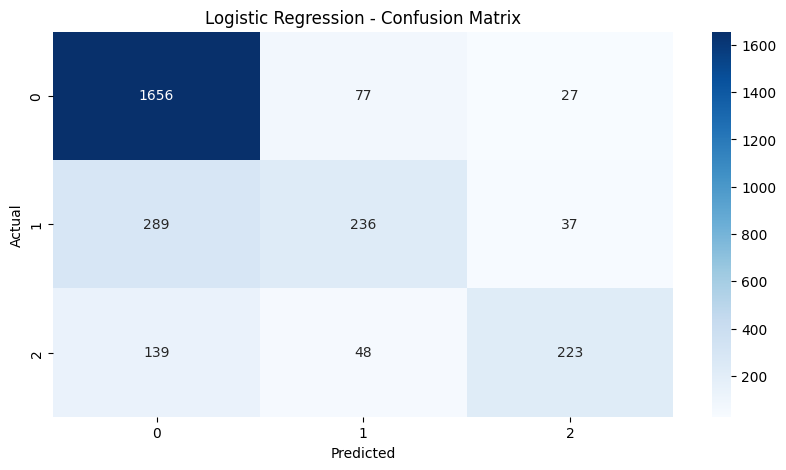

In [96]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(test_labels, logistic_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [97]:
real_example = ["Excellent service and comfortable seating", "The service was horrible and I will never return."]

real_example_tfidf = vectorizer.transform(real_example)

real_preds = logistic_model.predict(real_example_tfidf)

for text, pred in zip(real_example, real_preds):
    if pred == 1:
      sentiment = "Positive"
    elif pred == -1:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"
    print(f"- '{text}' is {sentiment}")

- 'Excellent service and comfortable seating' is Positive
- 'The service was horrible and I will never return.' is Negative


Save the model and vectorizer using joblib

In [98]:
model_folder = '../models/logistic_reg'
vec_folder = '../models/tf_idf'
joblib.dump(logistic_model, os.path.join(model_folder, 'lr_model.pkl'))
joblib.dump(vectorizer, os.path.join(vec_folder, 'vectorizer.pkl'))

['../models/tf_idf\\vectorizer.pkl']

Load the model and test it with a real example to see how it works

In [99]:
vectorizer = joblib.load(os.path.join(vec_folder, 'vectorizer.pkl'))
lr_model = joblib.load(os.path.join(model_folder, 'lr_model.pkl'))


real_example = ["Excellent service and comfortable seating", "The service was horrible and I will never return."]
real_example_tfidf = vectorizer.transform(real_example)
real_preds = lr_model.predict(real_example_tfidf)

for text, pred in zip(real_example, real_preds):
    if pred == 1:
      sentiment = "Positive"
    elif pred == -1:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"
    print(f"- '{text}' is {sentiment}")

- 'Excellent service and comfortable seating' is Positive
- 'The service was horrible and I will never return.' is Negative


## SVM Model

In [100]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, train_labels)

svm_preds = svm_model.predict(X_test)

print("SVM Results:")
print("Accuracy:", accuracy_score(test_labels, svm_preds))
print("Classification Report:\n", classification_report(test_labels, svm_preds))

SVM Results:
Accuracy: 0.7712298682284041
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.93      0.86      1760
           0       0.63      0.42      0.51       562
           1       0.75      0.58      0.66       410

    accuracy                           0.77      2732
   macro avg       0.73      0.64      0.67      2732
weighted avg       0.76      0.77      0.76      2732



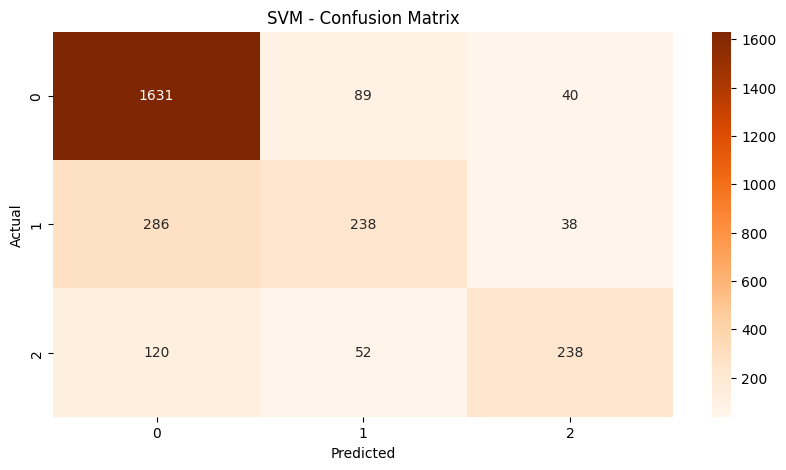

In [101]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(test_labels, svm_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
real_example = ["I regret choosing this airline.", "I had a wonderful time, highly recommended!"]

real_example_tfidf = vectorizer.transform(real_example)

real_preds = svm_model.predict(real_example_tfidf)

for text, pred in zip(real_example, real_preds):
    if pred == 1:
      sentiment = "Positive"
    elif pred == -1:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"
    print(f"- '{text}' is {sentiment}")


- 'I regret choosing this airline.' is Negative
- 'I had a wonderful time, highly recommended!' is Positive


Save the model using joblib

In [103]:
model_folder = '../models/svm'
joblib.dump(svm_model, os.path.join(model_folder, 'svm_model.pkl'))

['../models/svm\\svm_model.pkl']

Load the model and test it with a real example to see how it works

In [104]:
svm_model = joblib.load(os.path.join(model_folder, 'svm_model.pkl'))


real_example = ["Excellent service and comfortable seating", "The service was horrible and I will never return."]
real_example_tfidf = vectorizer.transform(real_example)
real_preds = svm_model.predict(real_example_tfidf)

for text, pred in zip(real_example, real_preds):
    if pred == 1:
      sentiment = "Positive"
    elif pred == -1:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"
    print(f"- '{text}' is {sentiment}")

- 'Excellent service and comfortable seating' is Positive
- 'The service was horrible and I will never return.' is Negative


## Transformers based models

### BERT Model

Starting With BERT Model:

Bert is a transformer-based model that has achieved state-of-the-art results on a variety of NLP tasks. We will use the `transformers` library from Hugging Face to load the pre-trained BERT model and tokenizer.

In [105]:
import time

train_texts, test_texts, train_labels, test_labels = train_test_split(
    twitter_data_cleaned['text'], twitter_data_cleaned['airline_sentiment'], test_size=0.2, random_state=42
)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_function(train_texts)
test_encodings = tokenize_function(test_texts)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 3
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

start_time = time.time()

model.train()
for epoch in range(3):  
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

print("Training complete!\n")

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training complete! Time taken: {elapsed_time:.2f} seconds")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 2: 100%|██████████| 732/732 [12:44<00:00,  1.04s/it, loss=0.405] 

Training complete!
Training complete! Time taken: 5340.92 seconds


In [106]:
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=-1).tolist())
        true_labels.extend(batch['labels'].tolist())

true_labels = [int(label) for label in true_labels]
predictions = [int(pred) for pred in predictions]

print(classification_report(true_labels, predictions, target_names=label_encoder.classes_.astype(str)))

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89      1889
           0       0.65      0.55      0.60       580
           1       0.76      0.76      0.76       459

    accuracy                           0.81      2928
   macro avg       0.76      0.74      0.75      2928
weighted avg       0.81      0.81      0.81      2928



Save the model

In [107]:
model.save_pretrained('../models/bert_saved')
tokenizer.save_pretrained('../models/bert_saved')

Load the model and test it with a real example to see how it works

In [108]:
model = BertForSequenceClassification.from_pretrained('../models/bert_saved')
tokenizer = BertTokenizer.from_pretrained('../models/bert_saved')

sentences = [
    "The flight was delayed for hours, and no one informed us, I'm so frustrated!", 
    "it was a normal flight.", 
    "I had a wonderful flight experience! The crew was amazing and the food was delicious!", 
]

true_labels = [0, 1, 2]
predictions = []

model.eval()

with torch.no_grad():
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=-1).item()
        predictions.append(predicted_class)

label_encoder = LabelEncoder()
label_encoder.fit([0, 1, 2])

for sentence, true_label, predicted_label in zip(sentences, true_labels, predictions):
    print(f"Sentence: '{sentence}'")
    print(f"True Sentiment: {label_encoder.classes_[true_label]}")
    print(f"Predicted Sentiment: {label_encoder.classes_[predicted_label]}")
    print("-" * 50)


Sentence: 'The flight was delayed for hours, and no one informed us, I'm so frustrated!'
True Sentiment: 0
Predicted Sentiment: 0
--------------------------------------------------
Sentence: 'it was a normal flight.'
True Sentiment: 1
Predicted Sentiment: 1
--------------------------------------------------
Sentence: 'I had a wonderful flight experience! The crew was amazing and the food was delicious!'
True Sentiment: 2
Predicted Sentiment: 2
--------------------------------------------------


### DistilBERT Model

Apply DistilBERT Model:

DistilBERT is a smaller version of BERT that retains most of its performance while being faster and requiring less memory.

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, AdamW, get_scheduler
import torch
from tqdm import tqdm

train_texts, test_texts, train_labels, test_labels = train_test_split(
    twitter_data_cleaned['text'], twitter_data_cleaned['airline_sentiment'], test_size=0.2, random_state=42
)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_function(train_texts)
test_encodings = tokenize_function(test_texts)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 3
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

start_time = time.time()

model.train()
for epoch in range(3): 
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

print("Training complete!\n")

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training complete! Time taken: {elapsed_time:.2f} seconds")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 2: 100%|██████████| 732/732 [06:42<00:00,  1.82it/s, loss=0.491]  

Training complete!
Training complete! Time taken: 1163.42 seconds


Save the model

In [110]:
model.save_pretrained('../models/distilbert_saved')
tokenizer.save_pretrained('../models/distilbert_saved')

In [111]:
from sklearn.metrics import classification_report
import torch

model.eval()

predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        logits = outputs.logits

        predicted_labels = torch.argmax(logits, dim=-1)

        predictions.extend(predicted_labels.tolist())
        true_labels.extend(batch['labels'].tolist())

true_labels = [int(label) for label in true_labels]
predictions = [int(pred) for pred in predictions]

print(classification_report(true_labels, predictions, target_names=label_encoder.classes_.astype(str)))

              precision    recall  f1-score   support

          -1       0.86      0.90      0.88      1889
           0       0.68      0.49      0.57       580
           1       0.69      0.80      0.74       459

    accuracy                           0.81      2928
   macro avg       0.74      0.73      0.73      2928
weighted avg       0.80      0.81      0.80      2928



Load the model and test it with a real example to see how it works

In [117]:
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

model = DistilBertForSequenceClassification.from_pretrained('../models/distilbert_saved')
tokenizer = DistilBertTokenizer.from_pretrained('../models/distilbert_saved')

sentences = [
    "The flight was delayed for hours, and no one informed us, I'm so frustrated!",  
    "The flight was on normal", 
    "I had a wonderful flight experience! The crew was amazing and the food was delicious!",  
]

true_labels = [0, 1, 2]
predictions = []

model.eval()

with torch.no_grad():
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=-1).item()
        predictions.append(predicted_class)

label_encoder = LabelEncoder()
label_encoder.fit([0, 1, 2])

for sentence, true_label, predicted_label in zip(sentences, true_labels, predictions):
    print(f"Sentence: '{sentence}'")
    print(f"True Sentiment: {label_encoder.classes_[true_label]}")
    print(f"Predicted Sentiment: {label_encoder.classes_[predicted_label]}")
    print("-" * 50)

Sentence: 'The flight was delayed for hours, and no one informed us, I'm so frustrated!'
True Sentiment: 0
Predicted Sentiment: 0
--------------------------------------------------
Sentence: 'The flight was on normal'
True Sentiment: 1
Predicted Sentiment: 1
--------------------------------------------------
Sentence: 'I had a wonderful flight experience! The crew was amazing and the food was delicious!'
True Sentiment: 2
Predicted Sentiment: 2
--------------------------------------------------
